In [1]:
import collections
import copy

def ld():
    return [int(x) for x in open("19.txt").read().split(',')]


class m:
    idgen=0
    
    #get op and modes of following 3 addresses
    def ix(s,x):
        assert(x>=0)
        x="%05d"%(x)
        op=int(x[3:])
        m3,m2,m1=[int(c) for c in x[:3]]
        return op,m1,m2,m3


    def gv(s,p,ip,m,ix):
        assert(ix in [1,2,3])
        if m==0:#reg
            return p[p[ip+ix]]
        elif m==1:#imm
            return p[ip+ix] 
        elif m==2:#reg+rb
            return p[p[ip+ix]+s.rb]
        assert(0)
        
            
        

    
    def __init__(s,p):
        #load to mem
        s.p=collections.defaultdict(int)
        for i,v in enumerate(p):
            s.p[i]=v
            
        #possible data source
        s.supplier=None
        
        #input queue
        s.i=[]
        
        #id
        s.id=m.idgen
        m.idgen+=1
        
        #iterator for execution
        #s.it=s.iterator()
        s.ip=0
        
        #print("M",s.id,"created")
        
        #relative base
        s.rb=0
        
    
    def sendInput(s, i):
        s.i.append(i)
        
    
    def getData(s):
        ip=s.ip
        
        while 1:
            op,m1,m2,m3=s.ix(s.p[ip])
            
            if op==1:#add
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)+s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==2:#mul
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)*s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==3:#in
                assert(m1 in [0,2])
                r=None
                if len(s.i)>0:
                    r=s.i[0]
                    s.i=s.i[1:]
                else:
                    if s.supplier:
                        r=s.supplier.getData()
                    else:
                        print("id",s.id, "returning zero")
                        #assert(0)
                        r=0
                tix=s.p[ip+1]
                if m1==2:
                    tix+=s.rb
                s.p[tix]=r
                ip+=2
            elif op==4:#out
                
                r=s.gv(s.p,ip,m1,1)
                #print(s.id,"spits out",r)
                s.ip=ip+2
                return r
                #print("--id:",s.id,"onwards")
                
                
            elif op==5:#jump-if-true
                if s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==6:#jump-if-false
                if not s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==7:#less-than
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)<s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==8:#equals
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)==s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==9:#adjust relative base
                s.rb+=s.gv(s.p,ip,m1,1)
                ip+=2
            elif op in [99]:#end
                #print("fin", s.id)
                break
            else:
                print("id", s.id, "op",op,"c",c)
                assert(0)
            #print(op)
            
        
        return -1
    
#ld()    
    
    

In [2]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import random



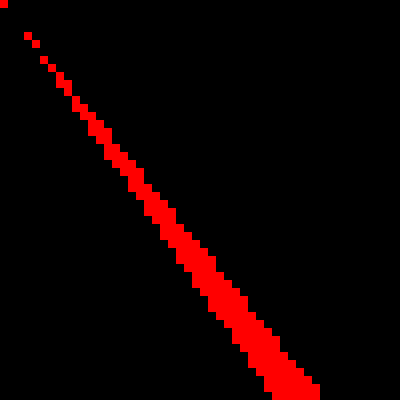

part1: 160 160


In [3]:

def p1():
    
    p=ld()
    M=m(p)
    N=50
    img=np.zeros([N,N,3],dtype=np.uint8)
    a=0
    for y in range(N):
        for x in range(N):
            M=m(p)
            M.sendInput(x)
            M.sendInput(y)
            v=M.getData()
            img[y,x,:]=[v*255,0,0]
            a+=v
            
    F=8
    img = cv2.resize(img, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    #display.clear_output(wait=True)
    display.display(Image.fromarray(img))

    return a
    
print("part1:", p1(),160)


In [ ]:

p=ld()
    
SM={}
def s(x,y):
    if (x,y) in SM:
        return SM[(x,y)]
    M=m(p)
    M.sendInput(x)
    M.sendInput(y)
    v=M.getData()
    SM[(x,y)]=v
    return v

def test(x,y,N):
    for yy in range(N):
        for xx in range(N):
            if s(x+xx,y+yy)==0:
                return 0
    return 1

def p2():
    N=100
    
    r=0
    x=0
    y=0
    st='d'
    while 1:
        if x>=0 and y>=0:
            if test(x,y,N):
                break
            #print(x,y)
        if st=='d':
            if y<r:
                y+=1
            else:
                x-=1
                st='l'
        elif st=='l':
            if x>=0:
                x-=1
            else:
                r+=1
                print(r,end='\r')
                x=r
                y=0
                st='d'
        
        
        
    #search
    
    
    
    return x*10000+y


print("\npart2:", p2(), 9441282  )


